## Adult census dataset

This dataset is openly accessible, either visit: UCI(University of California, Irvine) Machine Learning Repository, or Kaggle Adult Dataset.

AIM: To study about Census bureau Income Data Set (adult.csv) from kaggle.
  
  https://www.kaggle.com/code/alokevil/simple-eda-for-beginners/data

or can be found at
 http://www.census.gov/ftp/pub/DES/www/welcome.html
 

Data description:
    This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker 
    (Data Mining and Visualization, Silicon Graphics).
    The prediction task is to determine whether a person makes over $50K a year.

Fields/Attributes Included:
– Age
– Workclass
– Income
– Education
– Education-num
– Marital-status
– Occupation
– Relationship
– Race
– Sex
– Capital-gain
– Capital-loss
– Hours-per-week
– Native-country



- The goal of this machine learning project is to predict whether a person makes over $50K a year or not given their demographic variation,age,marital status and education. 
- This is a classification problem.

- Data preprocessing
The dataset contained null values, both numerical and categorical values. The categorical values were both nominal and ordinal. The data had redundant columns as well.

## Import the libraries

In [1]:

import pandas as pd  #used for data preprocessing
import numpy as np   #for numerical calculations
import matplotlib.pyplot as plt #for data visualization and graphical plotting
import seaborn as sns


In [2]:
pd.options.display.max_rows =10
pd.options.display.max_columns = 20

## Importing the dataset

In [3]:
#replacing some special character columns names with proper names
df = pd.read_csv("adult.csv")
df.rename(columns={'educational-num':'educational_number','marital-status':'marital_status','capital-gain':'capital_gain','capital-loss':'capital_loss','hours-per-week':'weekly_hours','native-country':'native_country'},inplace =True)

In [4]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational_number',
       'marital_status', 'occupation', 'relationship', 'race', 'gender',
       'capital_gain', 'capital_loss', 'weekly_hours', 'native_country',
       'income'],
      dtype='object')

In [5]:
#shape of the dataset
df.shape

(48842, 15)

In [6]:
#finding if there are any null values 
df.isnull().sum()

age                   0
workclass             0
fnlwgt                0
education             0
educational_number    0
                     ..
capital_gain          0
capital_loss          0
weekly_hours          0
native_country        0
income                0
Length: 15, dtype: int64

## The number of missing data points per column

In [7]:
# Even though the dataset doesnot contain any nan values,it contains '?'
#we can find that the dataset contains missing values in the form of '?' for "workclass","occupation","native-country" columns
# so to find the missing value '?'
df.isin(['?']).sum(axis = 0)

age                      0
workclass             2799
fnlwgt                   0
education                0
educational_number       0
                      ... 
capital_gain             0
capital_loss             0
weekly_hours             0
native_country         857
income                   0
Length: 15, dtype: int64

## Data Analysis and Cleaning

### How many people in dataset have income >50K or <=50K

<=50K    37155
>50K     11687
Name: income, dtype: int64


<AxesSubplot:ylabel='income'>

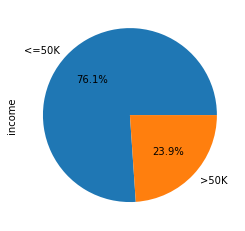

In [8]:
print(df['income'].value_counts())
df['income'].value_counts().plot.pie(autopct='%1.1f%%')

More people earn less or equal $ 5OK .

In [9]:
# Replace special character '?' with nan value in the respective columns 


df['workclass']= df['workclass'].replace('?',np.nan)

df['native_country']= df['native_country'].replace('?',np.nan)

df['occupation']= df['occupation'].replace('?',np.nan)


In [10]:
df.head()

,age,workclass,fnlwgt,education,educational_number,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,weekly_hours,native_country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [11]:
df.shape

(48842, 15)

In [12]:
#number of duplicates in the dataset
df.duplicated().sum()

52

In [13]:
# Remove the duplicates
df = df.drop_duplicates()

In [14]:
df.shape

(48790, 15)

In [15]:
# drop rows with missing values nan 
#df.dropna(how ='any',inplace = True)

In [16]:
df.shape

(48790, 15)

In [17]:
#dropping workclass without-pay

df = df[df.workclass != 'Without-pay']
df.head() 

,age,workclass,fnlwgt,education,educational_number,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,weekly_hours,native_country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [18]:
# Mapping the categorical data into numerical data using map function

#income
df['income'] = df['income'].map({'<=50K': 0, '>50K': 1}).astype(int)

In [19]:
df.corr()

,age,fnlwgt,educational_number,capital_gain,capital_loss,weekly_hours,income
age,1.000000,-0.076379,0.030861,0.077267,0.056860,0.071347,0.230317
fnlwgt,-0.076379,1.000000,-0.038807,-0.003740,-0.004338,-0.013630,-0.006339
educational_number,0.030861,-0.038807,1.000000,0.125219,0.081014,0.143853,0.332829
capital_gain,0.077267,-0.003740,0.125219,1.000000,-0.031478,0.082167,0.223066
capital_loss,0.056860,-0.004338,0.081014,-0.031478,1.000000,0.054420,0.147389
weekly_hours,0.071347,-0.013630,0.143853,0.082167,0.054420,1.000000,0.227591
income,0.230317,-0.006339,0.332829,0.223066,0.147389,0.227591,1.000000


- All the columns are weakly correlated

<AxesSubplot:>

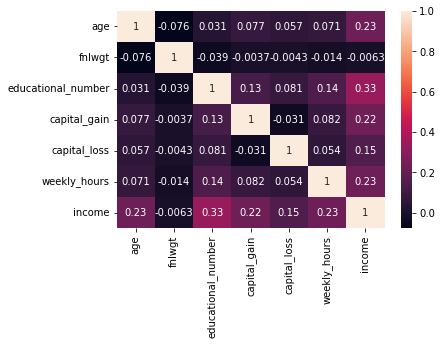

In [20]:
sns.heatmap(df.corr(),annot =True)

## Data Preprocessing

In [21]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

## Label Encoding

In [22]:
from sklearn.preprocessing import LabelEncoder
le1=LabelEncoder()
le3=LabelEncoder()
le5=LabelEncoder()
le6=LabelEncoder()
le7=LabelEncoder()
le8=LabelEncoder()
le9=LabelEncoder()
le13=LabelEncoder()
le=LabelEncoder()
X[:,1]=le1.fit_transform(X[:,1])
X[:,3]=le3.fit_transform(X[:,3])
X[:,5]=le5.fit_transform(X[:,5])
X[:,6]=le6.fit_transform(X[:,6])
X[:,7]=le7.fit_transform(X[:,7])
X[:,8]=le8.fit_transform(X[:,8])
X[:,9]=le9.fit_transform(X[:,9])
X[:,13]=le13.fit_transform(X[:,13])
y=le.fit_transform(y)

In [23]:
print(X)

[[25 3 226802 ... 0 40 38]
 [38 3 89814 ... 0 50 38]
 [28 1 336951 ... 0 40 38]
 ...
 [58 3 151910 ... 0 40 38]
 [22 3 201490 ... 0 20 38]
 [52 4 287927 ... 0 40 38]]


## Splitting Dataset into Training set and Test set

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

## Feature Scaling

In [25]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)


In [26]:
print(X_train)

[[ 1.04560535  1.86359067  0.06020859 ... -0.21704196 -0.03348768
   0.24945671]
 [-1.28998058 -0.22983003  1.10364666 ... -0.21704196 -0.43718375
   0.24945671]
 [-0.19517468 -0.22983003  0.85148941 ... -0.21704196 -0.19496611
   0.24945671]
 ...
 [-1.14400646 -0.22983003  0.25480214 ... -0.21704196 -1.64827196
   0.24945671]
 [-0.63309704 -0.22983003  2.35085401 ... -0.21704196 -1.64827196
  -1.40793803]
 [-0.48712292  1.16578377  0.99849986 ... -0.21704196 -0.03348768
   0.24945671]]


## Model Selection:


- Here our goal is to predict the income which can either be 0 or 1 ( less than 50K or greater than 50K) and we want to identify a relation between our output (income) and remaining independent features ( education, workclass, gender, etc. ). 
- This scenario is a classic example of Classification (classify whether income is <50K or more ).
- This is a Supervised Machine Learning Classification problem
- Based on these criteria we can narrow down our choice of models to a few:

Logistic Regression,
KNN or k-Nearest Neighbors,
Support Vector Machines,
Naive Bayes classifier,
Decision Tree,
Random Forest


## Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)# This line of code will build Logistic regression Model but doesnt train it
classifier.fit(X_train, y_train)# next training our classifier on Training set

LogisticRegression(random_state=0)

In [28]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),axis = 1))

[[0 1]
 [1 1]
 [0 1]
 ...
 [0 0]
 [0 0]
 [0 0]]


## Making Confusion Matrix

In [29]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

print("Accuracy:",accuracy_score(y_test, y_pred))

[[6887  428]
 [1358 1081]]
Accuracy: 0.8168956325610006


In [30]:
from sklearn.metrics import average_precision_score, recall_score, f1_score

av = average_precision_score(y_test, y_pred)
re = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('average_precision_score:',av)
print('recall_score:',re)
print('f1_score:',f1)

average_precision_score: 0.45672977176227064
recall_score: 0.44321443214432144
f1_score: 0.5476190476190477


- we achieved an accuracy value of 81.6% which is good for any machine learning prediction model particularly for a classification regression problem.

## Applying K-fold Cross Validation

In [33]:
from sklearn.model_selection import cross_val_score
accuracies=cross_val_score(estimator=classifier,X=X_train,y=y_train,cv=10)
print('Accuracy: {:.2f} Standard Deviation: {:.2f}'.format(accuracies.mean()*100,accuracies.std()*100))

Accuracy: 82.72 Standard Deviation: 0.52


## Predicting Test set Result

In [35]:
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[0 1]
 [1 1]
 [0 1]
 ...
 [0 0]
 [0 0]
 [0 0]]
